In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt                                                                         

# Load dataset


In [4]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

In [ ]:
target_labels = ['airplane', 
                 'automobile',
                 'bird',
                 'cat',
                 'deer',
                 'dog',
                 'frog',
                 'horse',
                 'ship',
                 'truck']

# Summarize loaded dataset

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


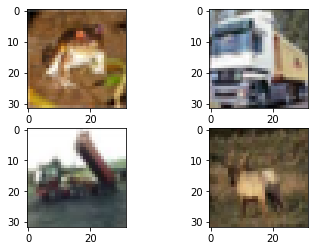

In [5]:
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X[i])
pyplot.show()

In [6]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

In [7]:
train_X = train_X.reshape(np.shape(train_X)[0], -1)
test_X = test_X.reshape(np.shape(test_X)[0], -1)

# one hot y values
train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)

# Preprocessing

In [8]:
# convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# normalize to range 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0

In [9]:
# split training hyperpatameters batch
split = int(train_X.shape[0] * 0.2)
hyperbatch_X = train_X[:split]
hyperbatch_Y = train_Y[:split]
hyperbatch_X.shape

(10000, 3072)

# Define model

In [10]:
def choose_hyperparams(nodes_number, activation):
  # define model
  model = Sequential()
  # define layeres
  model.add(Dense(nodes_number, activation=activation, input_dim=hyperbatch_X.shape[1]))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  # compile and fit
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
  history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))

  return history

In [11]:
def draw_acc_loss_plt(history):
  # acc
  plt.plot(history.history['acc'], 'b-')
  plt.plot(history.history['val_acc'], 'r-')
  plt.show()
  # loss
  plt.plot(history.history['loss'], 'b-')
  plt.plot(history.history['val_loss'], 'r-')
  plt.show()

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.3007 - acc: 0.1453 - val_loss: 2.2987 - val_acc: 0.1394
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2962 - acc: 0.1577 - val_loss: 2.2940 - val_acc: 0.1763
Epoch 3/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2908 - acc: 0.1944 - val_loss: 2.2882 - val_acc: 0.1883
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2843 - acc: 0.2088 - val_loss: 2.2815 - val_acc: 0.2032
Epoch 5/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2766 - acc: 0.2101 - val_loss: 2.2733 - val_acc: 0.2149
Epoch 6/30
313/313 [==============================] - 1s 5ms/step - loss: 2.2678 - acc: 0.2170 - val_loss: 2.2642 - val_acc: 0.2152
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2581 - acc: 0.2144 - val_loss: 2.2546 - val_acc: 0.2143
Epoch 8/30
313/313 [==============================] - 1s 4ms/step - loss: 2.

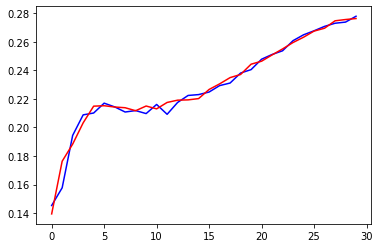

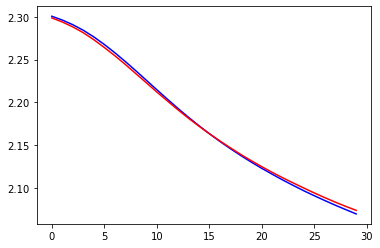

In [ ]:
history = choose_hyperparams(20, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2940 - acc: 0.1223 - val_loss: 2.2838 - val_acc: 0.1102
Epoch 2/30
313/313 [==============================] - 1s 5ms/step - loss: 2.2695 - acc: 0.1431 - val_loss: 2.2547 - val_acc: 0.1850
Epoch 3/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2349 - acc: 0.1946 - val_loss: 2.2188 - val_acc: 0.2172
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 2.1970 - acc: 0.2265 - val_loss: 2.1821 - val_acc: 0.2310
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 2.1608 - acc: 0.2438 - val_loss: 2.1488 - val_acc: 0.2579
Epoch 6/30
313/313 [==============================] - 1s 5ms/step - loss: 2.1296 - acc: 0.2570 - val_loss: 2.1210 - val_acc: 0.2706
Epoch 7/30
313/313 [==============================] - 1s 5ms/step - loss: 2.1032 - acc: 0.2752 - val_loss: 2.0968 - val_acc: 0.2836
Epoch 8/30
313/313 [==============================] - 1s 5ms/step - loss: 2.

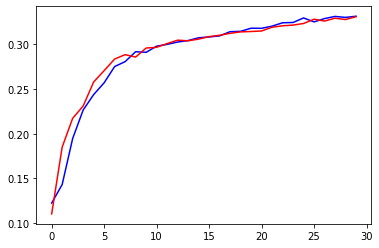

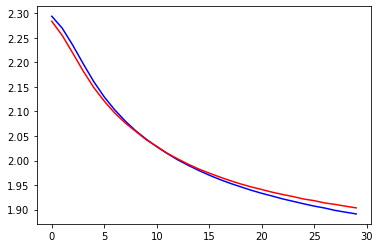

In [ ]:
history = choose_hyperparams(200, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2830 - acc: 0.1454 - val_loss: 2.2560 - val_acc: 0.2041
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2149 - acc: 0.2356 - val_loss: 2.1771 - val_acc: 0.2541
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 2.1368 - acc: 0.2566 - val_loss: 2.1106 - val_acc: 0.2681
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 2.0787 - acc: 0.2827 - val_loss: 2.0650 - val_acc: 0.2795
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 2.0363 - acc: 0.2928 - val_loss: 2.0293 - val_acc: 0.2913
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 2.0054 - acc: 0.3052 - val_loss: 1.9997 - val_acc: 0.2972
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 1.9803 - acc: 0.3078 - val_loss: 1.9775 - val_acc: 0.3063
Epoch 8/30
313/313 [==============================] - 2s 5ms/step - loss: 1.

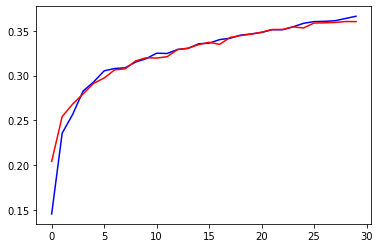

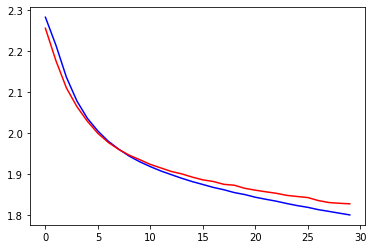

In [ ]:
history = choose_hyperparams(1000, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 6ms/step - loss: 2.2721 - acc: 0.1525 - val_loss: 2.2302 - val_acc: 0.2272
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 2.1726 - acc: 0.2341 - val_loss: 2.1276 - val_acc: 0.2658
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 2.0866 - acc: 0.2695 - val_loss: 2.0618 - val_acc: 0.2969
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 2.0313 - acc: 0.2847 - val_loss: 2.0189 - val_acc: 0.2917
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 1.9928 - acc: 0.3035 - val_loss: 1.9874 - val_acc: 0.2947
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 1.9653 - acc: 0.3061 - val_loss: 1.9642 - val_acc: 0.3020
Epoch 7/30
313/313 [==============================] - 1s 5ms/step - loss: 1.9424 - acc: 0.3113 - val_loss: 1.9441 - val_acc: 0.3150
Epoch 8/30
313/313 [==============================] - 1s 5ms/step - loss: 1.

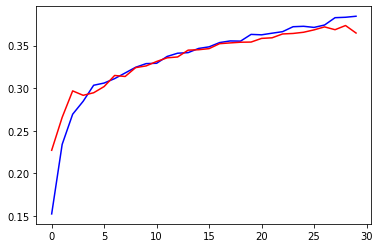

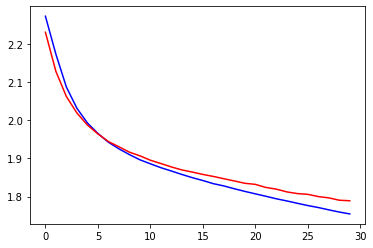

In [ ]:
history = choose_hyperparams(2000, 'relu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2880 - acc: 0.1217 - val_loss: 2.2721 - val_acc: 0.1200
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2485 - acc: 0.1800 - val_loss: 2.2245 - val_acc: 0.2121
Epoch 3/30
313/313 [==============================] - 1s 4ms/step - loss: 2.1943 - acc: 0.2350 - val_loss: 2.1698 - val_acc: 0.2764
Epoch 4/30
313/313 [==============================] - 1s 5ms/step - loss: 2.1415 - acc: 0.2755 - val_loss: 2.1235 - val_acc: 0.2741
Epoch 5/30
313/313 [==============================] - 1s 4ms/step - loss: 2.0997 - acc: 0.2747 - val_loss: 2.0881 - val_acc: 0.2756
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 2.0668 - acc: 0.2868 - val_loss: 2.0588 - val_acc: 0.2886
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 2.0402 - acc: 0.2899 - val_loss: 2.0348 - val_acc: 0.2933
Epoch 8/30
313/313 [==============================] - 1s 4ms/step - loss: 2.

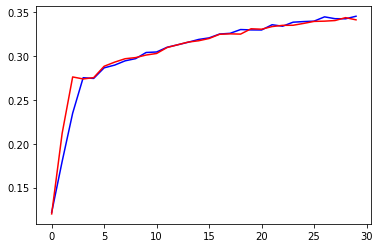

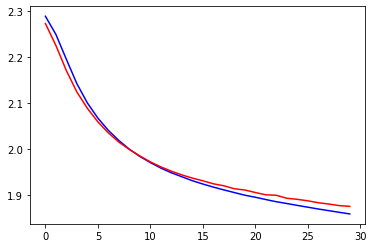

In [ ]:
history = choose_hyperparams(200, 'elu')
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.3020 - acc: 0.1111 - val_loss: 2.3011 - val_acc: 0.1054
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3003 - acc: 0.1082 - val_loss: 2.2994 - val_acc: 0.1097
Epoch 3/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2985 - acc: 0.1095 - val_loss: 2.2976 - val_acc: 0.1133
Epoch 4/30
313/313 [==============================] - 1s 5ms/step - loss: 2.2965 - acc: 0.1230 - val_loss: 2.2957 - val_acc: 0.1209
Epoch 5/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2945 - acc: 0.1281 - val_loss: 2.2936 - val_acc: 0.1270
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2923 - acc: 0.1303 - val_loss: 2.2914 - val_acc: 0.1342
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 2.2899 - acc: 0.1396 - val_loss: 2.2890 - val_acc: 0.1390
Epoch 8/30
313/313 [==============================] - 1s 4ms/step - loss: 2.

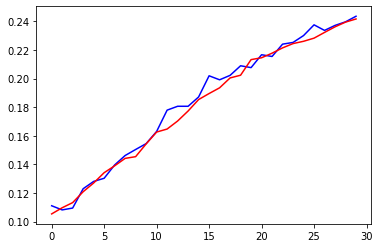

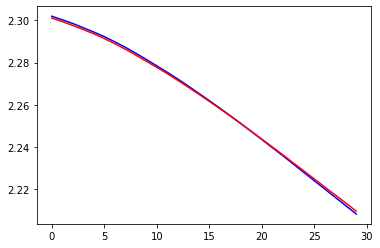

In [ ]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2926 - acc: 0.1096 - val_loss: 2.2816 - val_acc: 0.1200
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2663 - acc: 0.1536 - val_loss: 2.2510 - val_acc: 0.1998
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2300 - acc: 0.2219 - val_loss: 2.2127 - val_acc: 0.2257
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 2.1900 - acc: 0.2554 - val_loss: 2.1741 - val_acc: 0.2644
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 2.1518 - acc: 0.2711 - val_loss: 2.1395 - val_acc: 0.2766
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 2.1186 - acc: 0.2758 - val_loss: 2.1097 - val_acc: 0.2805
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 2.0915 - acc: 0.2884 - val_loss: 2.0852 - val_acc: 0.2851
Epoch 8/30
313/313 [==============================] - 2s 5ms/step - loss: 2.

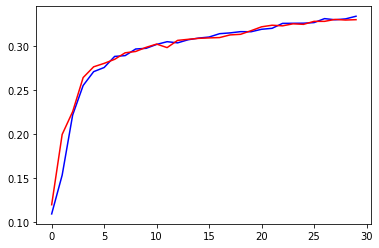

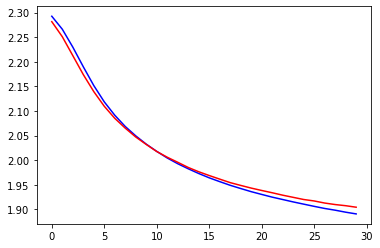

In [ ]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2947 - acc: 0.1347 - val_loss: 2.2867 - val_acc: 0.1441
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 2.2762 - acc: 0.1705 - val_loss: 2.2661 - val_acc: 0.1679
Epoch 3/30
313/313 [==============================] - 1s 5ms/step - loss: 2.2517 - acc: 0.2034 - val_loss: 2.2394 - val_acc: 0.2231
Epoch 4/30
313/313 [==============================] - 1s 5ms/step - loss: 2.2223 - acc: 0.2451 - val_loss: 2.2096 - val_acc: 0.2551
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 2.1915 - acc: 0.2659 - val_loss: 2.1802 - val_acc: 0.2603
Epoch 6/30
313/313 [==============================] - 1s 5ms/step - loss: 2.1621 - acc: 0.2743 - val_loss: 2.1524 - val_acc: 0.2758
Epoch 7/30
313/313 [==============================] - 1s 5ms/step - loss: 2.1344 - acc: 0.2772 - val_loss: 2.1267 - val_acc: 0.2837
Epoch 8/30
313/313 [==============================] - 2s 5ms/step - loss: 2.

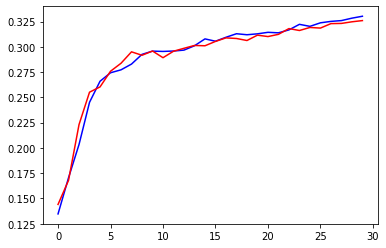

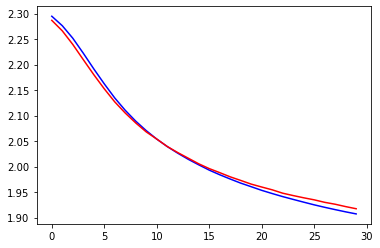

In [ ]:
nodes_number = 200
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 2.2055 - acc: 0.1739 - val_loss: 2.0925 - val_acc: 0.2181
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 2.0492 - acc: 0.2449 - val_loss: 2.0215 - val_acc: 0.2505
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9944 - acc: 0.2606 - val_loss: 1.9703 - val_acc: 0.2674
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9414 - acc: 0.2773 - val_loss: 1.9439 - val_acc: 0.2818
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9071 - acc: 0.2960 - val_loss: 1.8922 - val_acc: 0.3071
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.8628 - acc: 0.3203 - val_loss: 1.8414 - val_acc: 0.3254
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 1.8291 - acc: 0.3279 - val_loss: 1.8187 - val_acc: 0.3354
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 1.

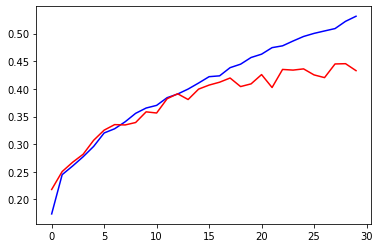

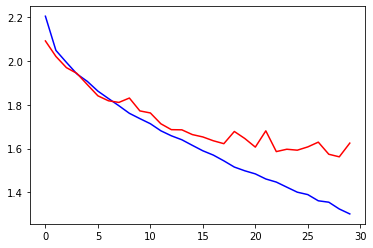

In [ ]:
nodes_number = 2048
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 2.1582 - acc: 0.1869 - val_loss: 2.0600 - val_acc: 0.2173
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 2.0056 - acc: 0.2413 - val_loss: 1.9623 - val_acc: 0.2586
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9441 - acc: 0.2676 - val_loss: 1.9296 - val_acc: 0.2708
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.8894 - acc: 0.2912 - val_loss: 1.8940 - val_acc: 0.2969
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 1.8579 - acc: 0.3076 - val_loss: 1.9463 - val_acc: 0.2964
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.8250 - acc: 0.3266 - val_loss: 1.8597 - val_acc: 0.3041
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 1.7966 - acc: 0.3429 - val_loss: 1.8605 - val_acc: 0.3206
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 1.

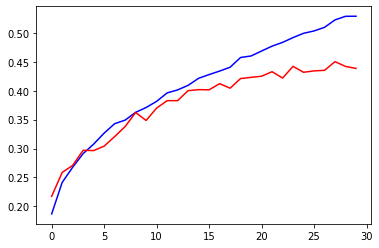

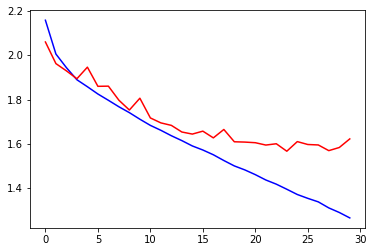

In [ ]:
nodes_number = 2048
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 2.1886 - acc: 0.1674 - val_loss: 2.0839 - val_acc: 0.2147
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 2.0216 - acc: 0.2380 - val_loss: 2.0291 - val_acc: 0.2302
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9551 - acc: 0.2729 - val_loss: 1.9209 - val_acc: 0.2907
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.9000 - acc: 0.3009 - val_loss: 1.8751 - val_acc: 0.3185
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.8654 - acc: 0.3125 - val_loss: 1.8717 - val_acc: 0.3104
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.8261 - acc: 0.3313 - val_loss: 1.8622 - val_acc: 0.3216
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 1.7944 - acc: 0.3428 - val_loss: 1.7872 - val_acc: 0.3523
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 1.

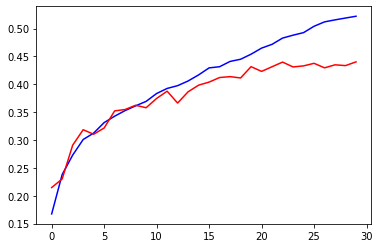

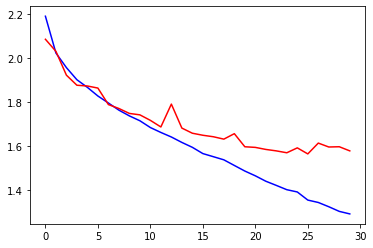

In [ ]:
model = Sequential()
nodes_number = 2048
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.01)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(hyperbatch_X, hyperbatch_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

In [ ]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.44269999861717224

# Train all 5 batches

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9292 - acc: 0.2958 - val_loss: 1.7409 - val_acc: 0.3849
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7234 - acc: 0.3805 - val_loss: 1.6585 - val_acc: 0.4089
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6081 - acc: 0.4250 - val_loss: 1.6347 - val_acc: 0.4099
Epoch 4/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5317 - acc: 0.4535 - val_loss: 1.4924 - val_acc: 0.4779
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4662 - acc: 0.4768 - val_loss: 1.5027 - val_acc: 0.4618
Epoch 6/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4112 - acc: 0.4972 - val_loss: 1.4259 - val_acc: 0.4934
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3617 - acc: 0.5142 - val_loss: 1.4119 - val_acc: 0.4977
Epoch 8/30
1563/1563 [==============================] - 8s 5ms

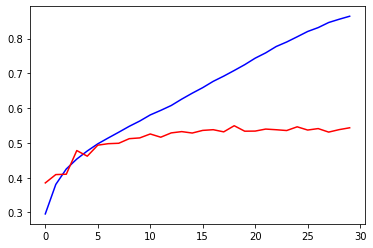

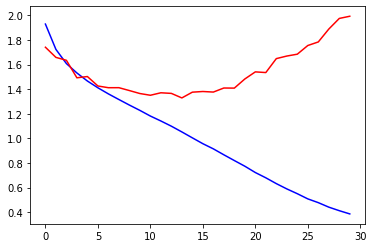

In [18]:
model = Sequential()
nodes_number = 2048
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.01)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_X, train_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))
draw_acc_loss_plt(history)

## Dynamic

In [13]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [16]:
model = Sequential()
nodes_number = 2048
# define model
model = Sequential()
# define layeres
model.add(Dense(nodes_number, activation='relu', kernel_initializer='he_uniform', input_dim=hyperbatch_X.shape[1]))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dropout((0.01)))

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile and fit
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

train_acc_score = []
test_acc_score = []
_k = 5

for train_index , test_index in kf.split(train_X):
    X_train , X_test = train_X[train_index,:], train_X[test_index,:]
    y_train , y_test = train_Y[train_index] , train_Y[test_index]
    
    history = model.fit(X_train, y_train, batch_size=32, epochs=10)
    #history = model.fit(train_X, train_Y, batch_size=32, epochs=30, validation_data=(test_X, test_Y))

    #draw_acc_loss_plt(history)
    pred_train_values = np.argmax(model.predict(X_train), axis=1)
    pred_test_values = np.argmax(model.predict(X_test), axis=1)

    y_train_arg = np.argmax(y_train, axis=1)
    y_test_arg = np.argmax(y_test, axis=1)

    train_acc = accuracy_score(pred_train_values , y_train_arg)
    test_acc = accuracy_score(pred_test_values , y_test_arg)
    
    print(train_acc)
    print(test_acc)
    train_acc_score.append(train_acc)
    test_acc_score.append(test_acc)
    
train_avg_acc_score = sum(train_acc_score)/_k
test_avg_acc_score = sum(test_acc_score)/_k

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9449 - acc: 0.2955
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7291 - acc: 0.3799
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6276 - acc: 0.4168
Epoch 4/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5464 - acc: 0.4454
Epoch 5/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4931 - acc: 0.4660
Epoch 6/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4371 - acc: 0.4894
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3848 - acc: 0.5053
Epoch 8/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3410 - acc: 0.5235
Epoch 9/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2926 - acc: 0.5379
Epoch 10/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2516 - acc: 0.5552
0.579675
0.5122
Epoch 1/10
12

In [17]:
# evaluate model
_, acc = model.evaluate(test_X, test_Y, verbose=0)
acc

0.5422000288963318

## Confusion matrix

[[662  49  69  21  37  18  11  32 141  64]
 [ 14 568  13  11   4   3  11   8  42 113]
 [ 60  17 410  74 153  69  65  50  15  14]
 [ 24  25  91 348  66 196  86  52  28  30]
 [ 35  12 128  66 460  61  91  80  30  10]
 [ 30  28 105 249  73 491  68  86  17  23]
 [ 18  16  85 120 109  71 622  36  12  22]
 [ 26  15  63  54  67  49  15 599  10  47]
 [ 89  83  19  21  20  28  12  11 649  52]
 [ 42 187  17  36  11  14  19  46  56 625]]


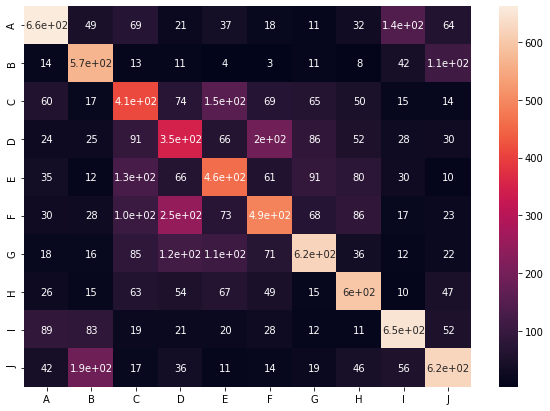

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn


pred_test_values = np.argmax(model.predict(test_X), axis=1)
y_test_arg = np.argmax(test_Y, axis=1)

cm = confusion_matrix(pred_test_values, y_test_arg)
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_arg, pred_test_values, target_names="ABCDEFGHIJ", digits=4))


              precision    recall  f1-score   support

           A     0.5996    0.6620    0.6293      1000
           B     0.7217    0.5680    0.6357      1000
           C     0.4423    0.4100    0.4255      1000
           D     0.3679    0.3480    0.3577      1000
           E     0.4728    0.4600    0.4663      1000
           F     0.4197    0.4910    0.4525      1000
           G     0.5599    0.6220    0.5893      1000
           H     0.6339    0.5990    0.6159      1000
           I     0.6596    0.6490    0.6542      1000
           J     0.5935    0.6250    0.6089      1000

    accuracy                         0.5434     10000
   macro avg     0.5471    0.5434    0.5435     10000
weighted avg     0.5471    0.5434    0.5435     10000

